Importing all required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import cv2 
import os 
import xml.etree.ElementTree as ET 
from PIL import Image 
from pathlib import Path 
import random 
import warnings 
warnings.filterwarnings("ignore")


In [2]:
img_dir = r'C:\Users\V Varunkumar\Desktop\dm programming\images' 
annotation_dir = r'C:\Users\V Varunkumar\Desktop\dm programming\annotation'

In [3]:
# Function to List all the directories inside the path 
def list_directories (path):
    return [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))] 

In [4]:
images_subdirs = list_directories (img_dir) 
annotations_subdirs = list_directories (annotation_dir)
print("Directories in Images folder:", images_subdirs) 
print("\nDirectories in Annotations folder:", annotations_subdirs)

Directories in Images folder: ['n02091831-Saluki', 'n02093859-Kerry_blue_terrier', 'n02108551-Tibetan_mastiff', 'n02111277-Newfoundland']

Directories in Annotations folder: ['n02091831-Saluki', 'n02093859-Kerry_blue_terrier', 'n02108551-Tibetan_mastiff', 'n02111277-Newfoundland']


(a) Cropping and Resize Images in Your 4-class Images Dataset

In [5]:
def get_bounding_boxes (annot_path):
    tree = ET.parse(annot_path) 
    root = tree.getroot() 
    objects = root.findall('object') 
    bbox = [] 
    for o in objects: 
        bndbox = o.find('bndbox') 
        xmin = int(bndbox.find('xmin').text) 
        ymin = int(bndbox.find('ymin').text) 
        xmax = int(bndbox.find('xmax').text) 
        ymax = int(bndbox.find('ymax').text) 
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox 

In [6]:
for subdir in images_subdirs: 
    #Path to the subdirectories of image and annotation 
    img_subdir_path = img_dir + "\\" + subdir    
    annot_subdir_path = annotation_dir +"\\"+ subdir 
    # Getting all xml files in the annotation subdirectory
    images = [img_subdir_path +"\\" + f for f in os.listdir(img_subdir_path)]   
    annotations = [annot_subdir_path +"\\" + f for f in os.listdir(annot_subdir_path)] 
    for i, annot in enumerate(annotations): 
        bbox = get_bounding_boxes(annot) 
        dog_image_path = images[i]
        im = Image.open(dog_image_path) 
        for j, box in enumerate (bbox): 
            im2 = im.crop (box) 
            im2 = im2.resize((128, 128))            
            new_path = str(dog_image_path).replace(str(img_dir), './Cropped').replace('.jpg', f'-{j}.jpg') 
            head, tail = os.path.split(new_path)
            Path(head).mkdir(parents=True, exist_ok=True) 
            im2.save(new_path)
            

In [7]:
cropped_dir = Path('./Cropped')


(b) Feature Extraction: Edge histogram AND Similarity Measurements

In [8]:
selected_images = {} 
for subdir in cropped_dir.iterdir(): 
    if subdir.is_dir(): 
        # List all jpg files in the subdirectory 
        image_files = list(subdir.glob('*.jpg')) 
        # Choose 2 images if available 
        if len(image_files) >= 2: 
            selected_images[subdir.name] = image_files[:1] #selecting 1 image 
        else: 
            print(f"Warning: Less than 2 images found for class {subdir.name}")

In [9]:
for class_name, images in selected_images.items(): 
    print(f"Class: {class_name}") 
    for img in images: 
        print(img) 
    print('-'* 50)

Class: n02091831-Saluki
Cropped\n02091831-Saluki\n02091831_10215-0.jpg
--------------------------------------------------
Class: n02093859-Kerry_blue_terrier
Cropped\n02093859-Kerry_blue_terrier\n02093859_10-0.jpg
--------------------------------------------------
Class: n02108551-Tibetan_mastiff
Cropped\n02108551-Tibetan_mastiff\n02108551_10182-0.jpg
--------------------------------------------------
Class: n02111277-Newfoundland
Cropped\n02111277-Newfoundland\n02111277_1008-0.jpg
--------------------------------------------------


In [10]:
for class_name, images in selected_images.items():
    # Opening the selected image 
    img = Image.open(images[0])
    # Display image size
    img_size = img.size  # This gives (width, height)
    print(f"Image Size: {img_size[0]} x {img_size[1]} pixels (Width x Height)")

Image Size: 128 x 128 pixels (Width x Height)
Image Size: 128 x 128 pixels (Width x Height)
Image Size: 128 x 128 pixels (Width x Height)
Image Size: 128 x 128 pixels (Width x Height)


In [11]:
def display_images (image_path): 
    img = Image.open(image_path) 
    gray_img = img.convert('L') 
    
    plt.figure(figsize=(10, 5)) 
    # Display colored image 
    plt.subplot(1, 2, 1) 
    plt.imshow(img)     
    plt.title('Coloured') 
    plt.axis('off') 
    # Display grayscale image 
    plt.subplot(1, 2, 2) 
    plt.imshow(gray_img, cmap='gray') 
    plt.title('Grayscale') 
    plt.axis('off')
    plt.show()

Class: n02091831-Saluki


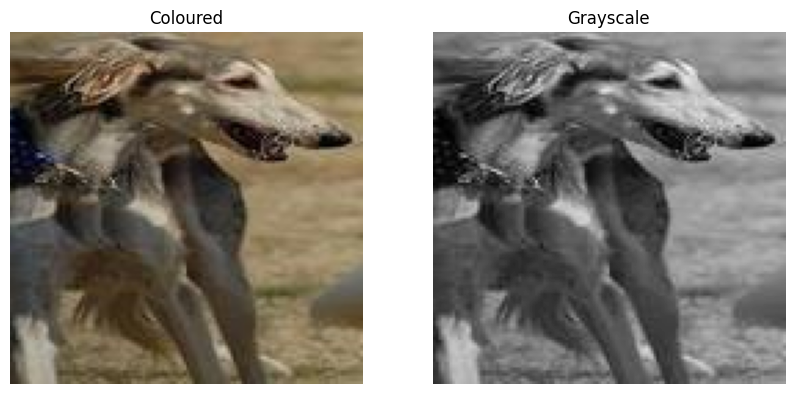

Class: n02093859-Kerry_blue_terrier


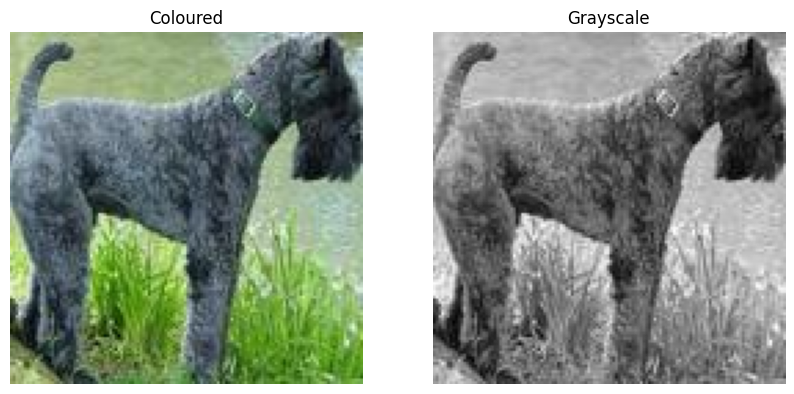

Class: n02108551-Tibetan_mastiff


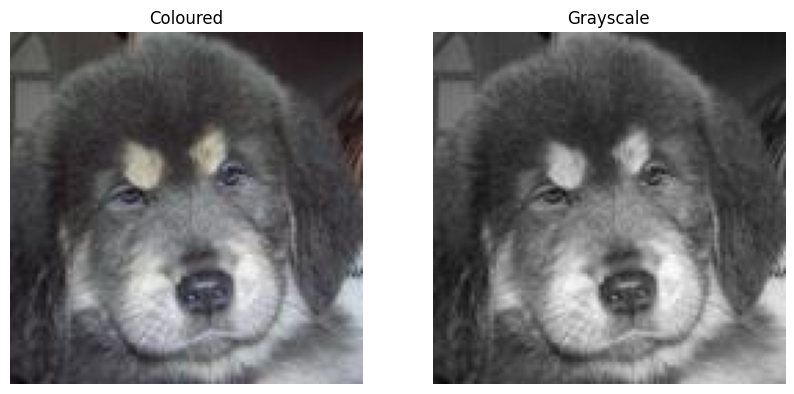

Class: n02111277-Newfoundland


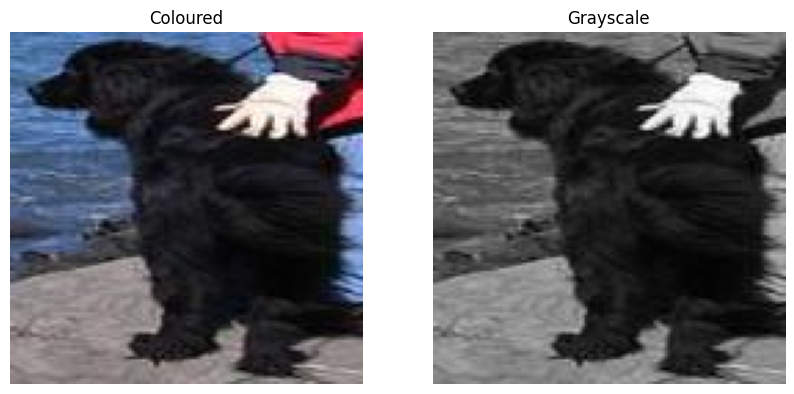

In [12]:
for class_name, images in selected_images.items(): 
    print(f"Class: {class_name}") 
    display_images (images[0])

Class: n02091831-Saluki
{WindowsPath('Cropped/n02091831-Saluki/n02091831_10215-0.jpg'): {'hist': array([713, 628, 589, 525, 447, 413, 422, 403, 362, 313, 308, 304, 296,
       293, 364, 339, 356, 358, 390, 423, 445, 433, 425, 470, 456, 439,
       444, 521, 435, 476, 510, 550, 599, 611, 633, 691], dtype=int64), 'centers': array([0.04363323, 0.13089969, 0.21816616, 0.30543262, 0.39269908,
       0.47996554, 0.56723201, 0.65449847, 0.74176493, 0.82903139,
       0.91629786, 1.00356432, 1.09083078, 1.17809725, 1.26536371,
       1.35263017, 1.43989663, 1.5271631 , 1.61442956, 1.70169602,
       1.78896248, 1.87622895, 1.96349541, 2.05076187, 2.13802833,
       2.2252948 , 2.31256126, 2.39982772, 2.48709418, 2.57436065,
       2.66162711, 2.74889357, 2.83616003, 2.9234265 , 3.01069296,
       3.09795942])}}
Processed Cropped\n02091831-Saluki\n02091831_10215-0.jpg, gradient angle and histogram computed.


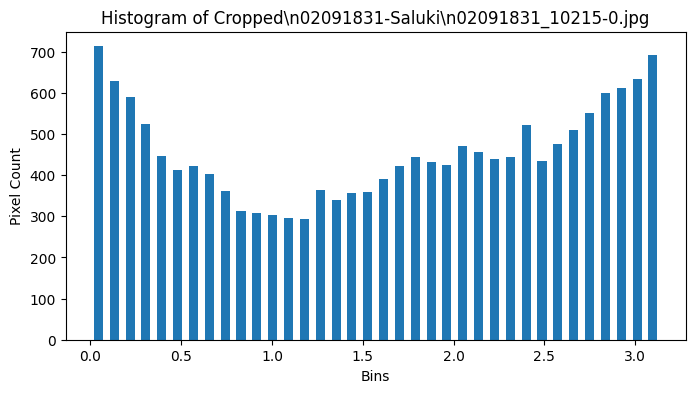

Class: n02093859-Kerry_blue_terrier
{WindowsPath('Cropped/n02091831-Saluki/n02091831_10215-0.jpg'): {'hist': array([713, 628, 589, 525, 447, 413, 422, 403, 362, 313, 308, 304, 296,
       293, 364, 339, 356, 358, 390, 423, 445, 433, 425, 470, 456, 439,
       444, 521, 435, 476, 510, 550, 599, 611, 633, 691], dtype=int64), 'centers': array([0.04363323, 0.13089969, 0.21816616, 0.30543262, 0.39269908,
       0.47996554, 0.56723201, 0.65449847, 0.74176493, 0.82903139,
       0.91629786, 1.00356432, 1.09083078, 1.17809725, 1.26536371,
       1.35263017, 1.43989663, 1.5271631 , 1.61442956, 1.70169602,
       1.78896248, 1.87622895, 1.96349541, 2.05076187, 2.13802833,
       2.2252948 , 2.31256126, 2.39982772, 2.48709418, 2.57436065,
       2.66162711, 2.74889357, 2.83616003, 2.9234265 , 3.01069296,
       3.09795942])}, WindowsPath('Cropped/n02093859-Kerry_blue_terrier/n02093859_10-0.jpg'): {'hist': array([417, 406, 422, 399, 372, 402, 380, 395, 411, 438, 475, 480, 491,
       516, 538, 562

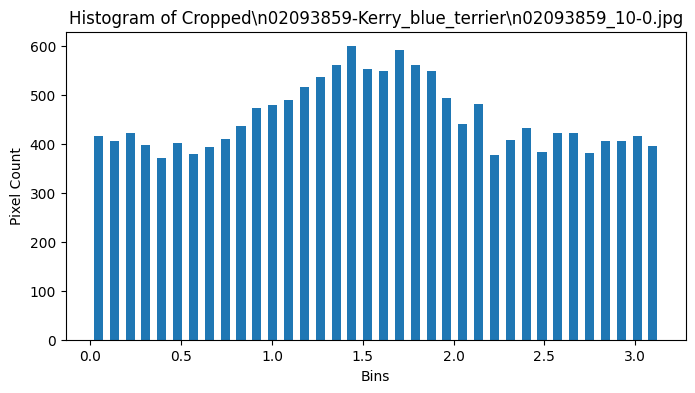

Class: n02108551-Tibetan_mastiff
{WindowsPath('Cropped/n02091831-Saluki/n02091831_10215-0.jpg'): {'hist': array([713, 628, 589, 525, 447, 413, 422, 403, 362, 313, 308, 304, 296,
       293, 364, 339, 356, 358, 390, 423, 445, 433, 425, 470, 456, 439,
       444, 521, 435, 476, 510, 550, 599, 611, 633, 691], dtype=int64), 'centers': array([0.04363323, 0.13089969, 0.21816616, 0.30543262, 0.39269908,
       0.47996554, 0.56723201, 0.65449847, 0.74176493, 0.82903139,
       0.91629786, 1.00356432, 1.09083078, 1.17809725, 1.26536371,
       1.35263017, 1.43989663, 1.5271631 , 1.61442956, 1.70169602,
       1.78896248, 1.87622895, 1.96349541, 2.05076187, 2.13802833,
       2.2252948 , 2.31256126, 2.39982772, 2.48709418, 2.57436065,
       2.66162711, 2.74889357, 2.83616003, 2.9234265 , 3.01069296,
       3.09795942])}, WindowsPath('Cropped/n02093859-Kerry_blue_terrier/n02093859_10-0.jpg'): {'hist': array([417, 406, 422, 399, 372, 402, 380, 395, 411, 438, 475, 480, 491,
       516, 538, 562, 6

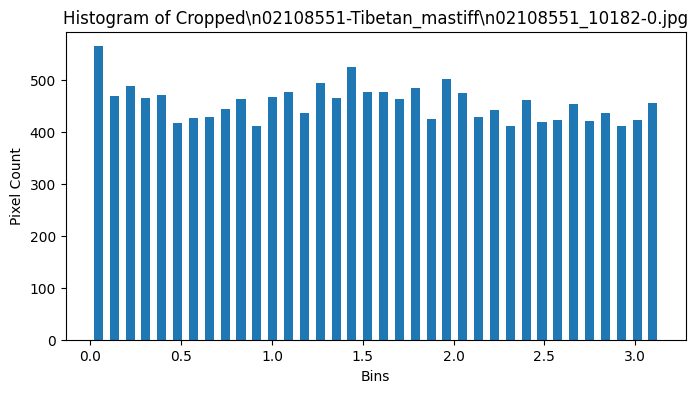

Class: n02111277-Newfoundland
{WindowsPath('Cropped/n02091831-Saluki/n02091831_10215-0.jpg'): {'hist': array([713, 628, 589, 525, 447, 413, 422, 403, 362, 313, 308, 304, 296,
       293, 364, 339, 356, 358, 390, 423, 445, 433, 425, 470, 456, 439,
       444, 521, 435, 476, 510, 550, 599, 611, 633, 691], dtype=int64), 'centers': array([0.04363323, 0.13089969, 0.21816616, 0.30543262, 0.39269908,
       0.47996554, 0.56723201, 0.65449847, 0.74176493, 0.82903139,
       0.91629786, 1.00356432, 1.09083078, 1.17809725, 1.26536371,
       1.35263017, 1.43989663, 1.5271631 , 1.61442956, 1.70169602,
       1.78896248, 1.87622895, 1.96349541, 2.05076187, 2.13802833,
       2.2252948 , 2.31256126, 2.39982772, 2.48709418, 2.57436065,
       2.66162711, 2.74889357, 2.83616003, 2.9234265 , 3.01069296,
       3.09795942])}, WindowsPath('Cropped/n02093859-Kerry_blue_terrier/n02093859_10-0.jpg'): {'hist': array([417, 406, 422, 399, 372, 402, 380, 395, 411, 438, 475, 480, 491,
       516, 538, 562, 600,

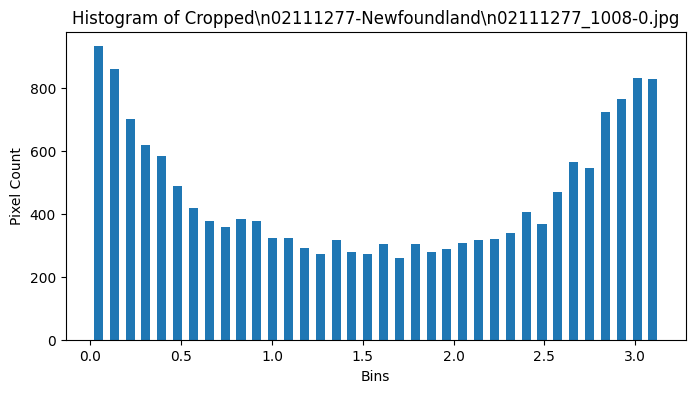

In [13]:
import numpy as np
from skimage import filters, color, exposure
from PIL import Image
import matplotlib.pyplot as plt

# Function for calculating gradient angle
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

# Function for computing the histogram with 36 bins 
def compute_histogram(gradient_angles, bins=36):
    hist, hist_centers = exposure.histogram(gradient_angles, nbins=bins)
    return hist, hist_centers

# Dictionary to store the gradient angle results and histograms
edge = {}
histograms = {}
hist_value= []

# Processing the images by class
for class_name, images in selected_images.items():
    print(f"Class: {class_name}")
    for img_path in images:
        img = Image.open(img_path)
        
        # Convert to grayscale
        img_np = np.array(img)  
        if len(img_np.shape) == 3:  # If the image is RGB, convert to grayscale
            image = color.rgb2gray(img_np)
        else:
            image = img_np  # If already grayscale, use it 

        # Calculate Sobel gradients and angles
        dx = filters.sobel_h(image)  # Horizontal gradient
        dy = filters.sobel_v(image)  # Vertical gradient
        angle_sobel = angle(dx, dy)  # Compute gradient angle

        # Store the angle result in edge dictionary
        edge[img_path] = angle_sobel
        hists= compute_histogram(angle_sobel, bins=36)
        hist_value.append(hists)
        # Compute the histogram with 36 bins for gradient angles
        hist, hist_centers = hists

        # Store the histogram and centers in histograms dictionary
        histograms[img_path] = {'hist': hist, 'centers': hist_centers}
        print(histograms)
       
        print(f"Processed {img_path}, gradient angle and histogram computed.")

        plt.figure(figsize=(8, 4))
        plt.bar(hist_centers, hist, width=0.05)
        plt.title(f"Histogram of {img_path}")
        plt.xlabel('Bins')
        plt.ylabel('Pixel Count')
        plt.show()
    


In [14]:
def compute_grayscale_histogram(image_path): 
    img = Image.open(image_path).convert('L') 
    img_np = np.asarray(img) 
    hist = cv2.calcHist([img_np], [0], None, [256], [0, 256]) 
    return hist.flatten()

In [15]:
def euclidean_distance (histA, histB): 
    return np.linalg.norm(histA - histB) 
def manhattan_distance (histA, histB): 
    return np.sum (np.abs(histA - histB)) 
def cosine_distance(histA, histB):
    dot_product = np.dot(histA.flatten(), histB.flatten())
    normA = np.linalg.norm(histA.flatten())
    normB = np.linalg.norm(histB.flatten())
    cosine_similarity = dot_product / (normA * normB)
    return 1 - cosine_similarity


In [16]:
two_class_distances = { 
    'Euclidean Distance': euclidean_distance (np.array(hist_value[0]), np.array(hist_value[1])), 
    'Manhattan Distance': manhattan_distance (np.array(hist_value[0]) , np.array(hist_value[1])), 
    'Cosine Distance': cosine_distance(np.array(hist_value[0]), np.array(hist_value[1]))}

In [17]:
print("\nDistance Metrics for Two Images from Different Classes:") 
for metric, value in two_class_distances.items(): 
    print(f"{metric}): {value:.4f}")


Distance Metrics for Two Images from Different Classes:
Euclidean Distance): 940.5339
Manhattan Distance): 4858.0000
Cosine Distance): 0.0568


(c) Histogram of Oriented Gradient (HOG) feature descriptor

In [18]:
random_class = random.choice (list(selected_images.keys()))
random_im_path = random.choice(selected_images [random_class])
img = Image.open(random_im_path) 
gray_img = img.convert('L')
gray_img_np = np.array(gray_img)

In [19]:
from skimage.feature import hog
hog_features, hog_image = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, channel_axis=None)


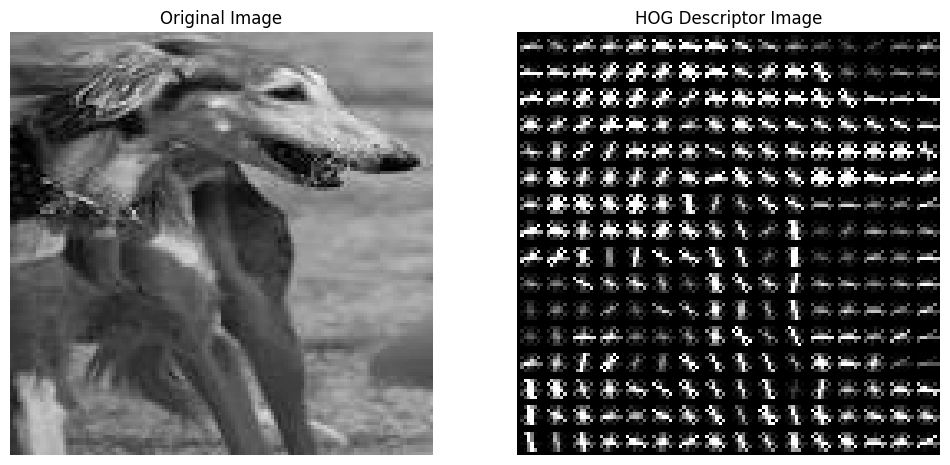

In [20]:
from skimage import exposure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Original image
ax1.imshow(gray_img, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

# HOG visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Descriptor Image')
ax2.axis('off')

plt.show()

(d) Dimensionality reduction (using Principal Component Analysis, PCA)

In [21]:
all_images = {} 
for subdir in cropped_dir.iterdir(): 
    if subdir.is_dir(): 
        # List all jpg files in the subdirectory 
        image_files = list(subdir.glob('*.jpg')) 
        if len(image_files) >= 2: 
            all_images[subdir.name] = image_files[:-1]
        else: 
            print(f"Warning: Less than 2 images found for class {subdir.name}")
            

In [22]:
# Processing the images by class
all_edges = {}
for class_name, images in all_images.items():
    print(f"Class: {class_name}")
    for img_path in images:
        # Open image using PIL
        img = Image.open(img_path)
        
        # Convert to grayscale
        img_np = np.array(img)  
        if len(img_np.shape) == 3:  # If the image is RGB then convert it into grayscale
            image = color.rgb2gray(img_np)
        else:
            image = img_np  # If already grayscale, use it 

        # Calculate Sobel gradients and angles
        dx = filters.sobel_h(image)  # Horizontal gradient
        dy = filters.sobel_v(image)  # Vertical gradient
        angle_sobel = angle(dx, dy)  # Compute gradient angle

        # Store the angle result in edge dictionary
        all_edges[img_path] = angle_sobel

Class: n02091831-Saluki
Class: n02093859-Kerry_blue_terrier
Class: n02108551-Tibetan_mastiff
Class: n02111277-Newfoundland


In [23]:
selected_classes = images_subdirs[:4] 
selected_images = {} 
for class_name in selected_classes: 
    class_dir = img_dir +"\\" +class_name 
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg'))] 
    selected_images [class_name] = [class_dir+"\\" +img_file for img_file in image_files] 

for class_name, images in selected_images.items(): 
    print(f"Number of images from {class_name}: {len(images)}")

Number of images from n02091831-Saluki: 200
Number of images from n02093859-Kerry_blue_terrier: 179
Number of images from n02108551-Tibetan_mastiff: 152
Number of images from n02111277-Newfoundland: 195


In [24]:
# Compute normalized histograms for all the selected images 
histograms = {} 
for class_name, image_paths in all_images.items(): 
    histograms [class_name] = [compute_grayscale_histogram(img_path) for img_path in image_paths] 
 


In [25]:
from sklearn.decomposition import PCA 
#Converting histograms dictionary into a flat List 
hist_list = [hist for class_hists in histograms.values() for hist in class_hists]
pca = PCA(n_components=2) 
hist_reduced = pca.fit_transform(hist_list)


In [26]:
for idx, class_name in enumerate(histograms):
    num_hists = len(histograms[class_name])
    print(f"Reduced Histograms for {class_name}: {hist_reduced[idx * num_hists:(idx + 1) * num_hists]}")

Reduced Histograms for n02091831-Saluki: [[-4.22974322e+02  1.27966531e+02]
 [-7.88489305e+02 -3.18435609e+02]
 [ 2.52683083e+02 -1.73568615e+02]
 [ 2.18406446e+02  3.82427152e+01]
 [-3.32824445e+02  5.17376111e+02]
 [-2.63666061e+02  1.57574989e+02]
 [ 1.14678614e+03 -3.94468028e+02]
 [ 1.66848663e+02 -1.48733157e+02]
 [-2.49015779e+02  3.29973236e+02]
 [-3.75498329e+02  2.44051936e+02]
 [-4.05355344e+02  1.45201018e+02]
 [-6.53599429e+02 -2.35207303e+02]
 [-2.75609234e+02 -2.31884560e+02]
 [-1.55164260e+02 -2.79372040e+01]
 [-5.82608035e+02 -1.58107551e+02]
 [-4.89716323e+02 -1.14219988e+02]
 [-3.47403258e+02 -1.62216607e+02]
 [ 3.36331541e+02  2.80479360e+02]
 [-2.95633194e-01  1.53441602e+02]
 [ 3.28354166e+02 -1.78420897e+02]
 [-1.65595300e+00  3.58065814e+02]
 [ 3.15988494e+02  2.02367896e+02]
 [-6.44881095e+02 -2.65733529e+02]
 [ 1.85262339e+02  3.70673142e+02]
 [ 2.84347705e+02 -2.59044979e+02]
 [-2.39650281e+02  1.63009537e+02]
 [ 1.77012530e+02  9.20462068e+02]
 [-3.47057591e

In [27]:
histograms.keys()

dict_keys(['n02091831-Saluki', 'n02093859-Kerry_blue_terrier', 'n02108551-Tibetan_mastiff', 'n02111277-Newfoundland'])

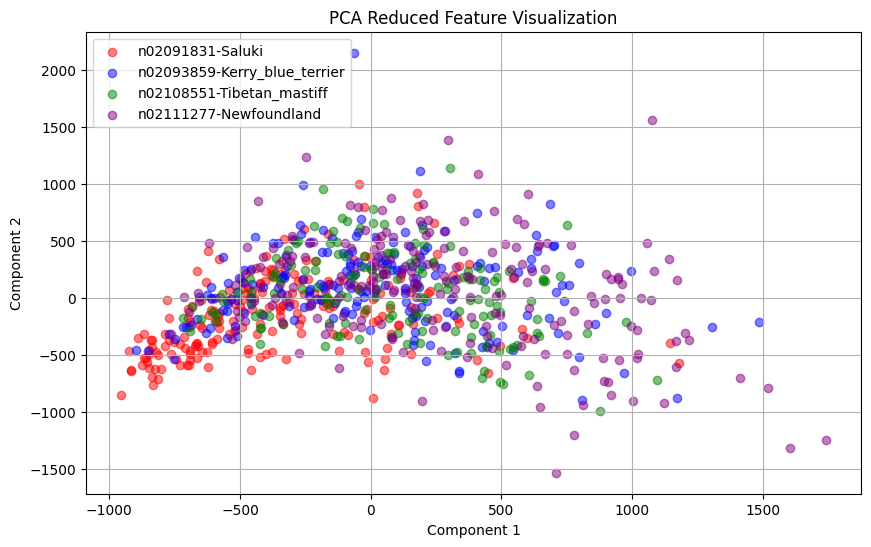

In [28]:
colors = ['red', 'blue', 'green', 'purple'] 
labels = list(histograms.keys()) 

plt.figure(figsize=(10, 6)) 
start_idx = 0 
for idx, (class_name, class_hists) in enumerate(histograms.items()): 
    end_idx = start_idx + len(class_hists) 
    plt.scatter(hist_reduced[start_idx:end_idx, 0], hist_reduced[start_idx:end_idx, 1], 
                c=colors[idx], label=class_name, alpha=0.5) 
    start_idx = end_idx 

plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title('PCA Reduced Feature Visualization') 
plt.grid(True) 
plt.legend()  
plt.show()


From the above plot, we can observe that all the classes are intersecting and cannot be separable. But the red points belong to the class "n02091831-Saluki", can be visually set apart in lesser amount comparing to the others at the bottom left. Where the other classes are mostly overlap each other in the center of the plot and hence they cannot visually separable

Reading the training set

In [29]:
import json
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Loading the dataset
file_path = r'C:\Users\V Varunkumar\Desktop\dm programming\student_31\train.json'  
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Extracting the tweets
tweets = [entry['Tweet'] for entry in data]

# Initialize the vectorizers and transform the data
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
count_matrix = count_vectorizer.fit_transform(tweets)
tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)
#count_features = count_vectorizer.get_feature_names_out()

print("Token Feature Count Matrix for the first 10 documents:")
for i in range(min(10, len(tweets))):  # prints up to 10 for verification
    print(f"\nDocument {i+1} token counts:")
    print(count_matrix.toarray()[i])  # Print the token counts for selected document

print("\nTF-IDF Feature Count Matrix for the first 10 documents:")
for i in range(min(10, len(tweets))):  # prints up to 10 for verification
    print(f"\nDocument {i+1} TF-IDF counts:")
    print(tfidf_matrix.toarray()[i])

print(f"\nCountVectorizer dimension: {count_matrix.shape}")
print(f"TfidfVectorizer dimension: {tfidf_matrix.shape}")


Token Feature Count Matrix for the first 10 documents:

Document 1 token counts:
[0 0 0 ... 0 0 0]

Document 2 token counts:
[0 0 0 ... 0 0 0]

Document 3 token counts:
[0 0 0 ... 0 0 0]

Document 4 token counts:
[0 0 0 ... 0 0 0]

Document 5 token counts:
[0 0 0 ... 0 0 0]

Document 6 token counts:
[0 0 0 ... 0 0 0]

Document 7 token counts:
[0 0 0 ... 0 0 0]

Document 8 token counts:
[0 0 0 ... 0 0 0]

Document 9 token counts:
[0 0 0 ... 0 0 0]

Document 10 token counts:
[0 0 0 ... 0 0 0]

TF-IDF Feature Count Matrix for the first 10 documents:

Document 1 TF-IDF counts:
[0. 0. 0. ... 0. 0. 0.]

Document 2 TF-IDF counts:
[0. 0. 0. ... 0. 0. 0.]

Document 3 TF-IDF counts:
[0. 0. 0. ... 0. 0. 0.]

Document 4 TF-IDF counts:
[0. 0. 0. ... 0. 0. 0.]

Document 5 TF-IDF counts:
[0. 0. 0. ... 0. 0. 0.]

Document 6 TF-IDF counts:
[0. 0. 0. ... 0. 0. 0.]

Document 7 TF-IDF counts:
[0. 0. 0. ... 0. 0. 0.]

Document 8 TF-IDF counts:
[0. 0. 0. ... 0. 0. 0.]

Document 9 TF-IDF counts:
[0. 0. 0. ..

In [30]:
labels = [] #Creating four separable classes
for entry in data:
    if entry['joy']:
        labels.append('Joy')
    elif entry['anger']:
        labels.append('Anger')
    elif entry['sadness']:
        labels.append('Sadness')
    elif entry['surprise']:
        labels.append('Surprise')
    else:
        labels.append('Other') 

df = pd.DataFrame({'Tweet': tweets, 'Emotion': labels})# Creating a DataFrame 

# Filter the DataFrame to separate the selected emotions
selected_emotions = ['Joy', 'Anger', 'Sadness', 'Surprise']
df_filtered = df[df['Emotion'].isin(selected_emotions)]

print("\nSelected Classes:")# Print the selected classes
for emotion in selected_emotions:
    print(f"- {emotion}")


Selected Classes:
- Joy
- Anger
- Sadness
- Surprise


In [31]:
# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_count_data = pca.fit_transform(count_matrix.toarray())  
pca_tfidf = PCA(n_components=2)
reduced_tfidf_data = pca_tfidf.fit_transform(tfidf_matrix.toarray())
reduced_count_df = pd.DataFrame(data=reduced_count_data, columns=['PCA1', 'PCA2'])
reduced_count_df['Emotion'] = df_filtered['Emotion'].reset_index(drop=True)

reduced_tfidf_df = pd.DataFrame(data=reduced_tfidf_data, columns=['PCA1', 'PCA2'])
reduced_tfidf_df['Emotion'] = df_filtered['Emotion'].reset_index(drop=True)
print("\nReduced PCA Data:")# Print the reduced data
print(reduced_count_df)
print("\nReduced PCA Data:")
print(reduced_tfidf_df)


Reduced PCA Data:
          PCA1      PCA2  Emotion
0     0.325822 -0.332136      Joy
1    -0.682282 -0.431461      Joy
2    -0.397113 -0.019127    Anger
3    -0.695044 -0.453337    Anger
4    -0.631551 -0.361290  Sadness
...        ...       ...      ...
2995 -0.542532 -0.379673      NaN
2996 -0.317720  0.477656      NaN
2997  0.674851  0.208649      NaN
2998  0.689920  1.049253      NaN
2999  0.722780 -0.499146      NaN

[3000 rows x 3 columns]

Reduced PCA Data:
          PCA1      PCA2  Emotion
0     0.016749  0.005161      Joy
1     0.039115 -0.025404      Joy
2    -0.005184 -0.032009    Anger
3     0.046470 -0.027785    Anger
4     0.004575  0.000867  Sadness
...        ...       ...      ...
2995  0.029429 -0.020061      NaN
2996 -0.038815 -0.021252      NaN
2997 -0.003491 -0.052665      NaN
2998 -0.181667  0.206594      NaN
2999 -0.027730 -0.064546      NaN

[3000 rows x 3 columns]


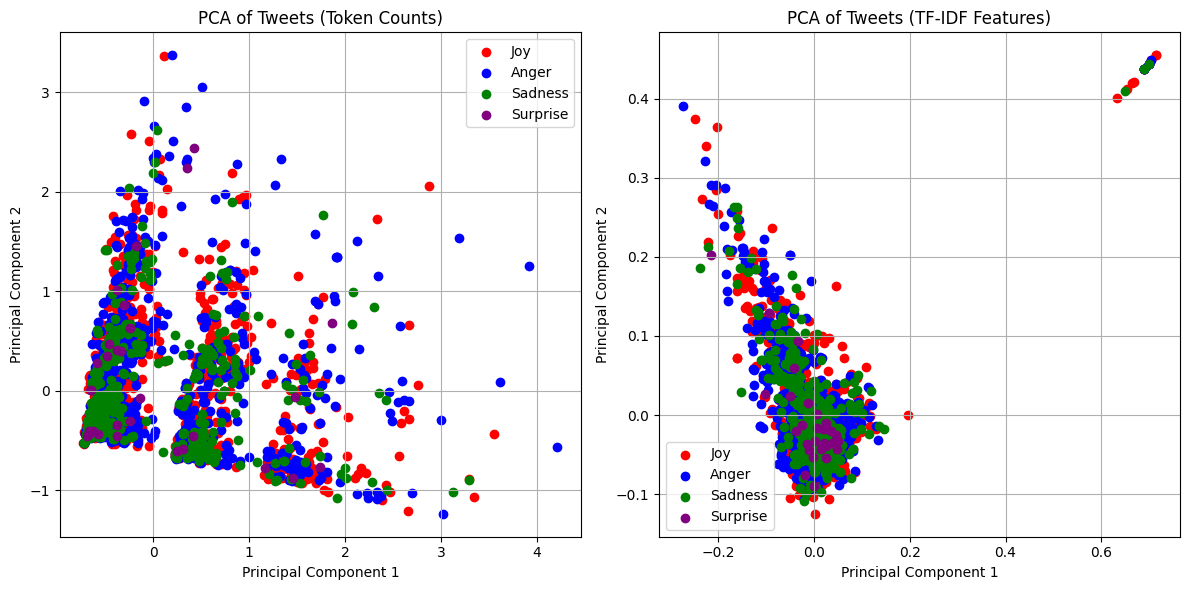

In [32]:
colors = ['red', 'blue', 'green', 'purple'] 
# Plot for token counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
for i,emotion in enumerate(selected_emotions):
    plt.scatter(reduced_count_df[reduced_count_df['Emotion'] == emotion]['PCA1'], 
                reduced_count_df[reduced_count_df['Emotion'] == emotion]['PCA2'], 
                label=emotion, c=colors[i])

plt.title('PCA of Tweets (Token Counts)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

# Plot for TF-IDF
plt.subplot(1, 2, 2) 
for i,emotion in enumerate(selected_emotions):
    plt.scatter(reduced_tfidf_df[reduced_tfidf_df['Emotion'] == emotion]['PCA1'], 
                reduced_tfidf_df[reduced_tfidf_df['Emotion'] == emotion]['PCA2'], 
                label=emotion, c=colors[i])

plt.title('PCA of Tweets (TF-IDF Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



In both the plots, no classes can visually separable because all the the classes are overlapped with each other. 